In [1]:
import h5py
from UniProtMapper import ProtMapper
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with h5py.File('data/viral_proteome', "r") as h5_file:
    # Extract gene names and embeddings
    k = list(h5_file.keys())
    repr_list = [h5_file[gene_name][:] for gene_name in k]

In [3]:
mapper = ProtMapper()
fields = ["organism_name"]
result, failed = mapper.get(k, fields=fields)

Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 500 / 500
Fetched: 286 / 286


In [4]:
import pandas as pd

df = pd.DataFrame({"Uniprot_ID": k, "Embedding": repr_list})
df = df.merge(result, left_on="Uniprot_ID", right_on="From")[["Uniprot_ID", "Embedding", "Organism"]]


In [5]:
df.groupby('Organism').count().sort_values('Embedding')

,Uniprot_ID,Embedding
Organism,,
Enterobacteria phage T6 (Bacteriophage T6),1,1
Erwinia phage FBB1,1,1
Choristoneura fumiferana granulovirus (CfGV),1,1
Citrus tristeza virus (isolate T36) (CTV),1,1
Cosavirus A (isolate Human/Pakistan/0553/-) (HCoSV-A),1,1
...,...,...
Invertebrate iridescent virus 6 (IIV-6) (Chilo iridescent virus),215,215
Vaccinia virus (strain Western Reserve) (VACV) (Vaccinia virus (strain WR)),218,218
Vaccinia virus (strain Copenhagen) (VACV),256,256


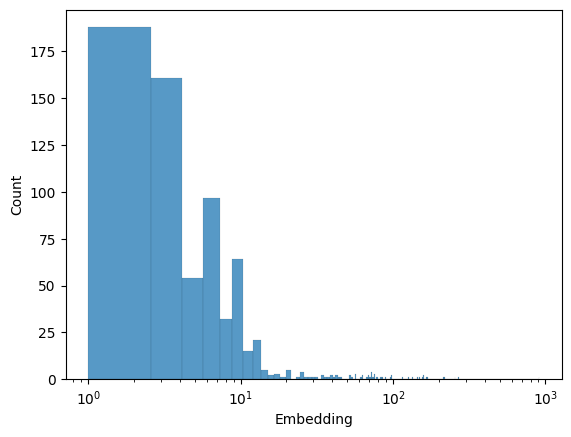

In [6]:
sns.histplot(df.groupby('Organism').count()['Embedding'])
plt.xscale('log')

In [7]:
for x in df['Organism'].unique():
    if "coronavirus" in x.lower():
        print(x)

Severe acute respiratory syndrome coronavirus 2 (2019-nCoV) (SARS-CoV-2)
Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004)
Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004)
Bat coronavirus HKU9 (BtCoV) (BtCoV/HKU9)
Beluga whale coronavirus (strain SW1) (BwCoV)
Middle East respiratory syndrome-related coronavirus (isolate United Kingdom/H123990006/2012) (MERS-CoV) (Betacoronavirus England 1)
Feline coronavirus (strain FIPV WSU-79/1146) (FCoV)
Murine coronavirus (strain A59) (MHV-A59) (Murine hepatitis virus)
Porcine transmissible gastroenteritis coronavirus (strain Purdue) (TGEV)
Human coronavirus 229E (HCoV-229E)
Human coronavirus HKU1 (isolate N5) (HCoV-HKU1)
Human coronavirus NL63 (HCoV-NL63)
Human coronavirus OC43 (HCoV-OC43)
Severe acute respiratory syndrome coronavirus (SARS-CoV)
Murine coronavirus (strain 2) (MHV-2) (Murine hepatitis virus)


In [8]:
for x in df['Organism'].unique():
    if "influenza" in x.lower():
        print(x)

Influenza A virus (strain A/Puerto Rico/8/1934 H1N1)
Influenza A virus (strain A/Aichi/2/1968 H3N2)
Influenza B virus (strain B/Lee/1940)
Parainfluenza virus 5 (strain W3) (PIV5) (Simian virus 5)
Influenza A virus (strain A/Goose/Guangdong/1/1996 H5N1 genotype Gs/Gd)
Human parainfluenza 2 virus (strain Toshiba) (HPIV-2)
Influenza C virus (strain C/Ann Arbor/1/1950)


In [9]:
for x in df['Organism'].unique():
    if "enterobacteria" in x.lower():
        print(x)

Enterobacteria phage N4 (Bacteriophage N4)
Escherichia phage T5 (Enterobacteria phage T5)
Enterobacteria phage T4 (Bacteriophage T4)
Enterobacteria phage phiX174 (Isolate Sanger) (Bacteriophage phi-X174)
Enterobacteria phage M13 (Bacteriophage M13)
Enterobacteria phage P4 (Bacteriophage P4)
Enterobacteria phage GA (Bacteriophage GA)
Enterobacteria phage T3 (Bacteriophage T3)
Enterobacteria phage S13 (Bacteriophage S13)
Enterobacteria phage PRD1 (Bacteriophage PRD1)
Enterobacteria phage SP (Bacteriophage SP)
Enterobacteria phage T6 (Bacteriophage T6)
Enterobacteria phage VT1-Sakai
Enterobacteria phage I2-2 (Bacteriophage I2-2)
Enterobacteria phage HK97 (Bacteriophage HK97)
Enterobacteria phage VT2-Sa (Bacteriophage VT2-Sa)
Enterobacteria phage SP6 (Bacteriophage SP6)
Enterobacteria phage HK620 (Bacteriophage HK620)


In [10]:
df["Embedding"] = df["Embedding"].apply(lambda x: x.tolist())  # convert numpy arrays to python lists

df.to_csv('data/Preprocessed_viral_proteomes.csv')